# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [2]:
# read the iris data into a pandas DataFrame, including column names

df = pd.read_csv('iris.csv')
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor
96,5.7,2.9,4.2,1.3,versicolor
97,6.2,2.9,4.3,1.3,versicolor
98,5.1,2.5,3.0,1.1,versicolor


## Task 2

In [3]:
# gather basic information
df.info()
print("\n")

print(df.describe())

print("\n")

print(df.head())

print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000



## Task 3

In [4]:
# use groupby to look for differences between the species
df.groupby('species').mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [5]:
# use sorting to look for differences between the species

df.sort_values("species")


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,virginica
120,6.9,3.2,5.7,2.3,virginica
121,5.6,2.8,4.9,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica


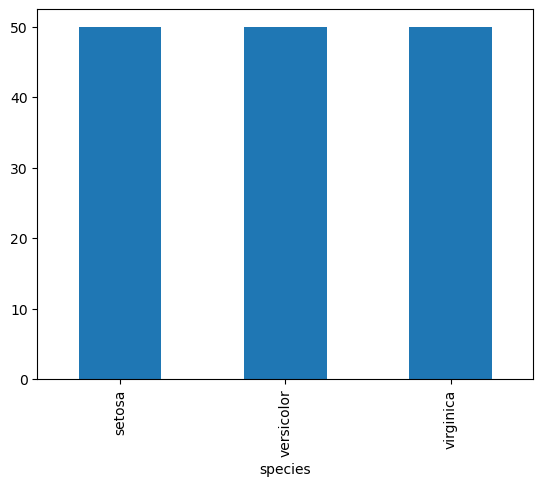

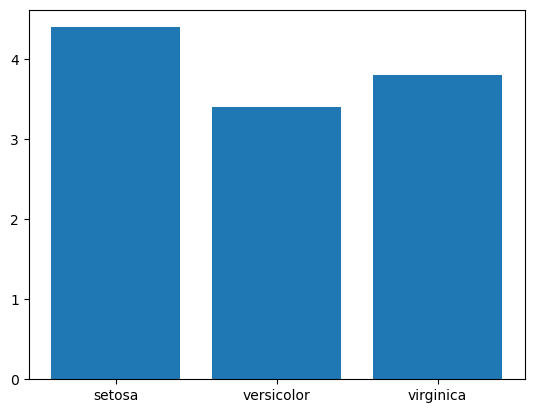

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [6]:
# use plotting to look for differences between the species

df["species"].value_counts().plot(kind='bar')
plt.show()

plt.bar(df["species"],df["sepal_width"])
plt.show()

df["species"].value_counts()

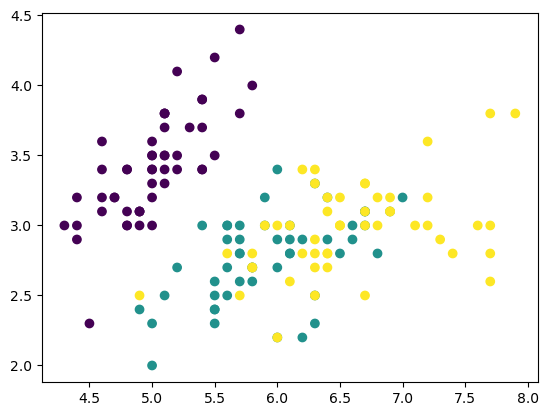

In [7]:
# map species to a numeric value so that plots can be colored by category
species_map = {
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
}

df["species_num"] = df["species"].map(species_map)

plt.scatter(df["sepal_length"], df["sepal_width"], c=df["species_num"], cmap='viridis')

plt.show()

## Task 4

In [8]:
df["predicted_species"] = np.where(
    df["petal_length"] < 2.5,
    "setosa",
    np.where(
        df["petal_width"] < 1.8,
        "versicolor",
        "virginica"
    )
)
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,predicted_species
0,5.1,3.5,1.4,0.2,setosa,0,setosa
1,4.9,3.0,1.4,0.2,setosa,0,setosa
2,4.7,3.2,1.3,0.2,setosa,0,setosa
3,4.6,3.1,1.5,0.2,setosa,0,setosa
4,5.0,3.6,1.4,0.2,setosa,0,setosa
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,1,versicolor
96,5.7,2.9,4.2,1.3,versicolor,1,versicolor
97,6.2,2.9,4.3,1.3,versicolor,1,versicolor
98,5.1,2.5,3.0,1.1,versicolor,1,versicolor


## Bonus

In [19]:
# define function that accepts a row of data and returns a predicted species

def predict_species(row):
    petal_length = row["petal_length"]
    petal_width = row["petal_width"]

    if petal_length < 2.5:
        return "setosa"
    elif petal_width < 1.8:
        return "versicolor"
    else:
        return "virginica"

df["predicted_species"] = df.apply(predict_species, axis=1)

In [16]:
df.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,predicted_species
0,5.1,3.5,1.4,0.2,setosa,0,setosa
1,4.9,3.0,1.4,0.2,setosa,0,setosa
2,4.7,3.2,1.3,0.2,setosa,0,setosa
3,4.6,3.1,1.5,0.2,setosa,0,setosa
4,5.0,3.6,1.4,0.2,setosa,0,setosa
...,...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,versicolor,1,versicolor
96,5.7,2.9,4.2,1.3,versicolor,1,versicolor
97,6.2,2.9,4.3,1.3,versicolor,1,versicolor
98,5.1,2.5,3.0,1.1,versicolor,1,versicolor


In [17]:
# END OF HOMEWORK